<a href="https://colab.research.google.com/github/vanshT1120/Simple-movie-recomender-system-using-ML/blob/main/movie_recommend_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import *
sns.set_style('white')
%matplotlib inline

In [3]:
#Get the data into Pandas Dataframe object
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('/content/dataset.csv', sep = '\t', names = column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
movie_titles = pd.read_csv('/content/movieIdTitles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [8]:
df = pd.merge(df, movie_titles, on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [9]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

,rating
title,
Aiqing wansui (1994),5.0
Entertaining Angels: The Dorothy Day Story (1996),5.0
Santa with Muscles (1996),5.0
Prefontaine (1997),5.0
They Made Me a Criminal (1939),5.0


In [10]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

,rating
title,
Aiqing wansui (1994),5.0
Entertaining Angels: The Dorothy Day Story (1996),5.0
Santa with Muscles (1996),5.0
Prefontaine (1997),5.0
They Made Me a Criminal (1939),5.0


In [11]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [12]:
ratings['numOfRatings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,numOfRatings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


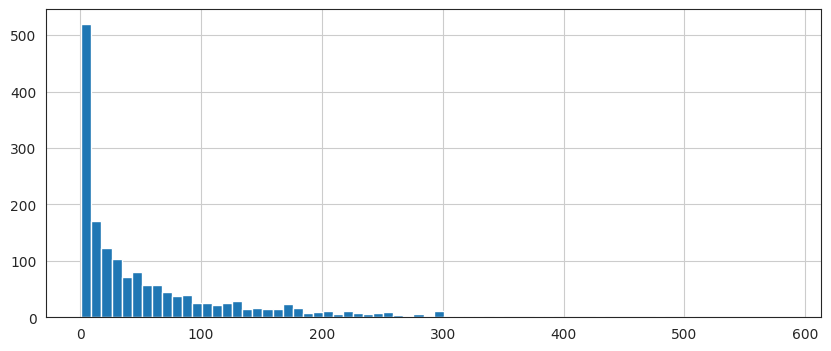

In [15]:
plt.figure(figsize = (10,4))
ratings['numOfRatings'].hist(bins = 70)
plt.show()

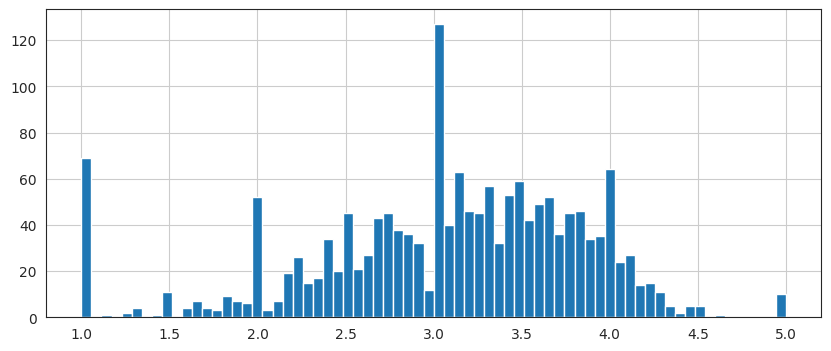

In [16]:
plt.figure(figsize = (10,4))
ratings['rating'].hist(bins = 70)
plt.show()

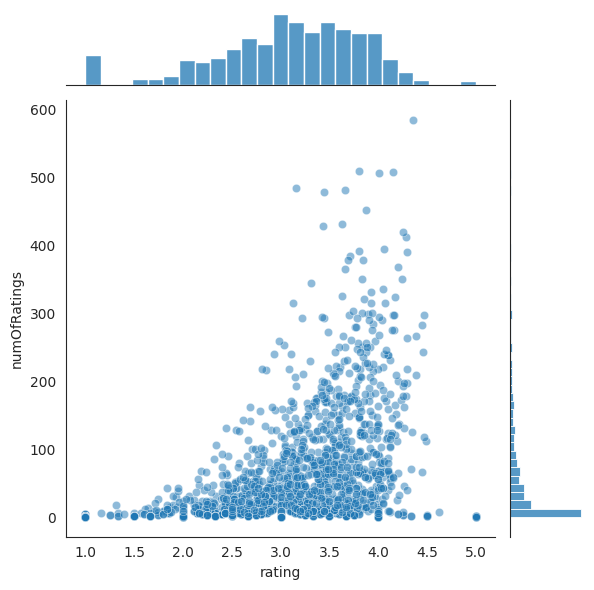

In [18]:
sns.jointplot(x='rating', y='numOfRatings', data = ratings, alpha = 0.5)
plt.show()

# **RECOMMENDER SYSTEM**


In [19]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Most Rated Movies with their Average Ratings
ratings.sort_values('numOfRatings', ascending = False).head(10)

,rating,numOfRatings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [32]:
ratings.fillna(0, inplace=True)  # Fill NaN in movieUserRatings
similarToThatMovie = moviemat.corrwith(ratings)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

   # Assuming moviemat is your user-movie rating matrix
similarity_matrix = cosine_similarity(moviemat.fillna(0))

In [29]:
import warnings
warnings.filterwarnings('ignore', message='Degrees of freedom <= 0 for slice')

In [35]:
ratings.head()

,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
title,,,,,,
'Til There Was You (1997),2.333333,9,"Ghost and the Darkness, The (1996)",Outbreak (1995),In the Line of Fire (1993),While You Were Sleeping (1995)
1-900 (1994),2.600000,5,Home Alone (1990),Interview with the Vampire (1994),Cinderella (1950),Raging Bull (1980)
101 Dalmatians (1996),2.908257,109,Outbreak (1995),Aladdin (1992),"Craft, The (1996)",Beauty and the Beast (1991)
12 Angry Men (1957),4.344000,125,Amadeus (1984),Apocalypse Now (1979),"African Queen, The (1951)",Ben-Hur (1959)
187 (1997),3.024390,41,Scream 2 (1997),Young Guns (1988),"Nightmare on Elm Street, A (1984)",Outbreak (1995)


In [36]:
ratings = ratings.fillna('-')

In [37]:
ratings.to_csv('MovieRecommendations.csv', encoding='utf-8')

In [38]:
df_result = pd.read_csv('/content/MovieRecommendations.csv')
df_result.head()

,title,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
0,'Til There Was You (1997),2.333333,9,"Ghost and the Darkness, The (1996)",Outbreak (1995),In the Line of Fire (1993),While You Were Sleeping (1995)
1,1-900 (1994),2.600000,5,Home Alone (1990),Interview with the Vampire (1994),Cinderella (1950),Raging Bull (1980)
2,101 Dalmatians (1996),2.908257,109,Outbreak (1995),Aladdin (1992),"Craft, The (1996)",Beauty and the Beast (1991)
3,12 Angry Men (1957),4.344000,125,Amadeus (1984),Apocalypse Now (1979),"African Queen, The (1951)",Ben-Hur (1959)
4,187 (1997),3.024390,41,Scream 2 (1997),Young Guns (1988),"Nightmare on Elm Street, A (1984)",Outbreak (1995)


In [39]:
#Load all the movie names
for i in df_result['title']:
    print(i)

'Til There Was You (1997)
1-900 (1994)
101 Dalmatians (1996)
12 Angry Men (1957)
187 (1997)
2 Days in the Valley (1996)
20,000 Leagues Under the Sea (1954)
2001: A Space Odyssey (1968)
3 Ninjas: High Noon At Mega Mountain (1998)
39 Steps, The (1935)
8 1/2 (1963)
8 Heads in a Duffel Bag (1997)
8 Seconds (1994)
A Chef in Love (1996)
Above the Rim (1994)
Absolute Power (1997)
Abyss, The (1989)
Ace Ventura: Pet Detective (1994)
Ace Ventura: When Nature Calls (1995)
Across the Sea of Time (1995)
Addams Family Values (1993)
Addicted to Love (1997)
Addiction, The (1995)
Adventures of Pinocchio, The (1996)
Adventures of Priscilla, Queen of the Desert, The (1994)
Adventures of Robin Hood, The (1938)
Affair to Remember, An (1957)
African Queen, The (1951)
Afterglow (1997)
Age of Innocence, The (1993)
Aiqing wansui (1994)
Air Bud (1997)
Air Force One (1997)
Air Up There, The (1994)
Airheads (1994)
Akira (1988)
Aladdin (1992)
Aladdin and the King of Thieves (1996)
Alaska (1996)
Albino Alligator (1

In [40]:
inputMovieName = widgets.Text()

def getRecommendations(sender):
    searchMovie = inputMovieName.value
    list_result = df_result[df_result['title'] == searchMovie]
    fm = list_result['FirstMovieRecommendation'].values[0]
    sm = list_result['SecondMovieRecommendation'].values[0]
    tm = list_result['ThirdMovieRecommendation'].values[0]
    fourthm = list_result['FourthMovieRecommendation'].values[0]
    finalRecommendationText = '1:' + fm + ' \n2:' + sm + ' \n3:' + tm + ' \n4:' + fourthm
    print('Your Recommendations for the Movie ' + searchMovie + ' are:\n')
    print(finalRecommendationText)

In [43]:
inputMovieName.on_submit(getRecommendations)
inputMovieName

Text(value='Wonderland (1997)')

Your Recommendations for the Movie Wonderland (1997) are:

1:0 
2:0 
3:0 
4:0


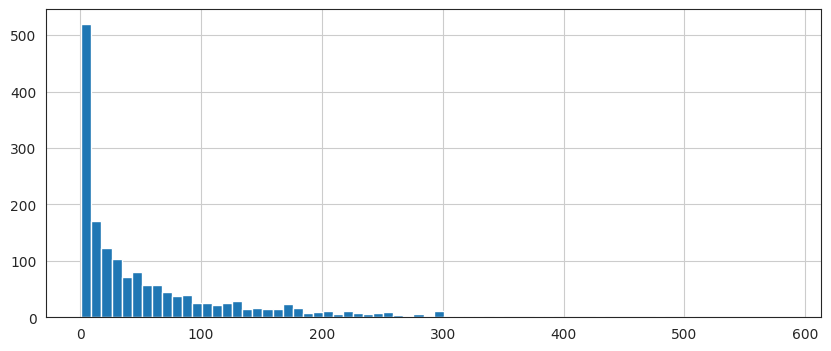

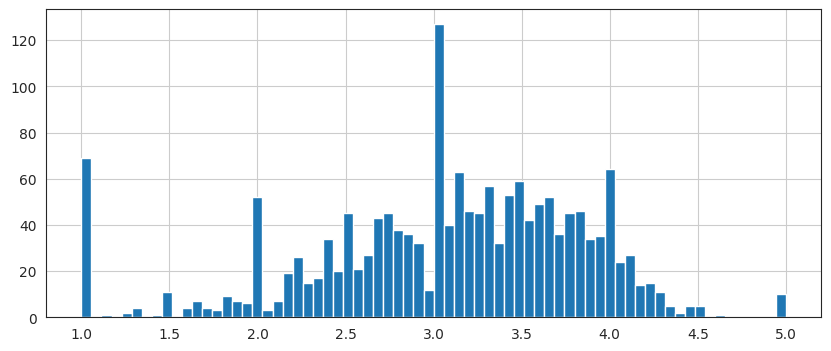

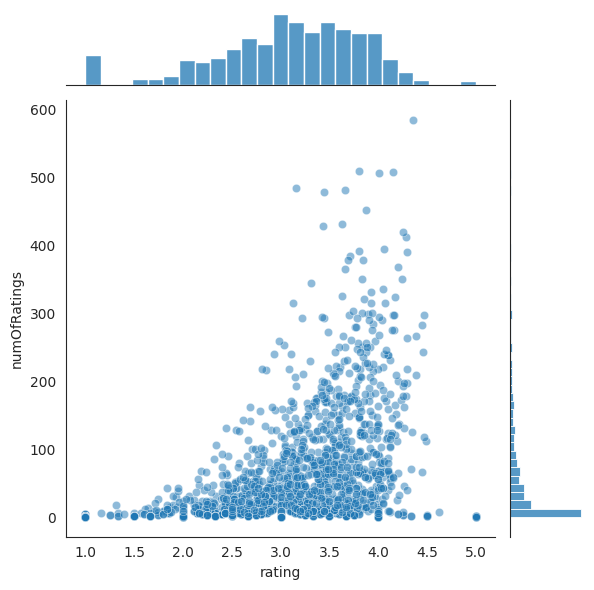

'Til There Was You (1997)
1-900 (1994)
101 Dalmatians (1996)
12 Angry Men (1957)
187 (1997)
2 Days in the Valley (1996)
20,000 Leagues Under the Sea (1954)
2001: A Space Odyssey (1968)
3 Ninjas: High Noon At Mega Mountain (1998)
39 Steps, The (1935)
8 1/2 (1963)
8 Heads in a Duffel Bag (1997)
8 Seconds (1994)
A Chef in Love (1996)
Above the Rim (1994)
Absolute Power (1997)
Abyss, The (1989)
Ace Ventura: Pet Detective (1994)
Ace Ventura: When Nature Calls (1995)
Across the Sea of Time (1995)
Addams Family Values (1993)
Addicted to Love (1997)
Addiction, The (1995)
Adventures of Pinocchio, The (1996)
Adventures of Priscilla, Queen of the Desert, The (1994)
Adventures of Robin Hood, The (1938)
Affair to Remember, An (1957)
African Queen, The (1951)
Afterglow (1997)
Age of Innocence, The (1993)
Aiqing wansui (1994)
Air Bud (1997)
Air Force One (1997)
Air Up There, The (1994)
Airheads (1994)
Akira (1988)
Aladdin (1992)
Aladdin and the King of Thieves (1996)
Alaska (1996)
Albino Alligator (1

Text(value='')

No recommendations found for 'star wars (1997)'. Please check the movie title.
Your Recommendations for the Movie Wonderland (1997) are:

1:0 
2:0 
3:0 
4:0
Your Recommendations for the Movie Wonderland (1997) are:

1:0 
2:0 
3:0 
4:0
Your Recommendations for the Movie Wonderland (1997) are:

1:0 
2:0 
3:0 
4:0
Your Recommendations for the Movie Wonderland (1997) are:

1:0 
2:0 
3:0 
4:0
Your Recommendations for the Movie Wonderland (1997) are:

1:0 
2:0 
3:0 
4:0


In [42]:
from IPython import get_ipython
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import *
sns.set_style('white')
%matplotlib inline

#Get the data into Pandas Dataframe object
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('/content/dataset.csv', sep = '\t', names = column_names)
df.head()

movie_titles = pd.read_csv('/content/movieIdTitles.csv')
movie_titles.head()

df = pd.merge(df, movie_titles, on = 'item_id')
df.head()

df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

ratings['numOfRatings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

plt.figure(figsize = (10,4))
ratings['numOfRatings'].hist(bins = 70)
plt.show()

plt.figure(figsize = (10,4))
ratings['rating'].hist(bins = 70)
plt.show()

sns.jointplot(x='rating', y='numOfRatings', data = ratings, alpha = 0.5)
plt.show()

moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()
#Most Rated Movies with their Average Ratings
ratings.sort_values('numOfRatings', ascending = False).head(10)

ratings.fillna(0, inplace=True)  # Fill NaN in movieUserRatings

from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(moviemat.fillna(0))

import warnings
warnings.filterwarnings('ignore', message='Degrees of freedom <= 0 for slice')

ratings.head()

df_result = pd.read_csv('/content/MovieRecommendations.csv')
df_result.head()

#Load all the movie names
for i in df_result['title']:
    print(i)

inputMovieName = widgets.Text()

def getRecommendations(sender):
    searchMovie = inputMovieName.value
    list_result = df_result[df_result['title'] == searchMovie]

    # Check if list_result is empty
    if list_result.empty:
        print(f"No recommendations found for '{searchMovie}'. Please check the movie title.")
        return

    fm = list_result['FirstMovieRecommendation'].values[0]
    sm = list_result['SecondMovieRecommendation'].values[0]
    tm = list_result['ThirdMovieRecommendation'].values[0]
    fourthm = list_result['FourthMovieRecommendation'].values[0]

    finalRecommendationText = '1:' + fm + ' \n2:' + sm + ' \n3:' + tm + ' \n4:' + fourthm
    print('Your Recommendations for the Movie ' + searchMovie + ' are:\n')
    print(finalRecommendationText)

inputMovieName.on_submit(getRecommendations)
inputMovieName
